# Lab 2 - Datasets and Python (СИА 1.1)
**Выполнил: Демин Д.П.**

**Группа: P3213**

**Номер в потоке: 4**

In [144]:
# All imports
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math

## Задание 1

**Дано:**

Датасет *Australian AIDS Survival Data*, хранящий данные о пациентах, проходивших лечение от СПИДа до 1 июля 1991.

Датасет содержит 2843 строки и следующие столбцы:

- State - Аббревиатура названия региона Австралии.
- Sex - Пол пациента.
- Diag* - Дата диагноза.
- Death* - Дата смерти или окончания лечения.
- Status - "A" (жив) или "D" (мертв) на момент окончания лечения.
- T.categ - Способ заражения.
- Age - Возраст, когда пациенту был поставлен диагноз.

**Цель:**

Научиться работать с датасетами в *Python*.

### Задача 1
Прочитать данные из файла Aids2.csv и загрузите их в датафрейм.

In [53]:
# Data:
# file with dataset in google.drive
filename = 'drive/MyDrive/ITMO/data_analysis/python/Lab4/Aids2.csv'

# Decision:
# read data from file
df = pd.read_csv(filename)
# remove unnecessary columns
df.drop(['Unnamed: 0', 'diag', 'death'], axis='columns', inplace=True)

# Result of program:
print('Dataframe:')
print(df.head(5))

Dataframe:
  state sex status T.categ  age
0   NSW   M      D      hs   35
1   NSW   M      D      hs   53
2   NSW   M      D      hs   42
3   NSW   M      D    haem   44
4   NSW   M      D      hs   39


### Задача 2
Узнать информацию о размере датасета и типах хранящихся в нем данных.

In [54]:
print(f'dtypes:\n{df.dtypes}\n')
print(f'size: {df.size}')
print(f'shape: {df.shape}')

dtypes:
state      object
sex        object
status     object
T.categ    object
age         int64
dtype: object

size: 14215
shape: (2843, 5)


### Задача 3
Основываясь на информации из датасета, выяснить, кого больше в процентном
соотношении: мужчин или женщин, – заразившихся СПИДом.

In [55]:
df_males = df.loc[df['sex']=='M']
df_females = df.loc[df['sex']=='F']
print(f'males:  {round(df_males.shape[0] / df.shape[0] * 100, 2)}%')
print(f'females: {round(df_females.shape[0] / df.shape[0] * 100, 2)}%')

males:  96.87%
females: 3.13%


### Задача 4
Выяснить, каков процент мужчин до 45 лет, успешно прошедших курс лечения, по
отношению к общему количеству заболевших мужчин.

In [56]:
df_alive_males_under45 = df_males.query('age <= 45 and status == "A"')
print('Percentage of live males under 45 years of age from all males: ', end='')
print(f'{round(df_alive_males_under45.shape[0] / df_males.shape[0] * 100, 2)}%')

Percentage of live males under 45 years of age from all males: 31.37%


### Задача 5
Показать, как соотносятся возраст и смертность у пациентов старше 14 лет. Построить
график функции.

In [57]:
query = 'age >= 14 and status == "D"'
df_age_over14_number_dead = df.query(query)['age'].value_counts().sort_index().to_frame(name='number of dead')
df_age_over14_number_dead.reset_index(inplace=True)
df_age_over14_number_dead = df_age_over14_number_dead.rename(columns={'index': 'age'})
print('Age-to-death ratio in patients over 14 years of age:')
print(df_age_over14_number_dead.head(5))	

Age-to-death ratio in patients over 14 years of age:
   age  number of dead
0   14               2
1   15               2
2   16               1
3   17               2
4   18               1


#### Способ 1
Метод ***plot.line***

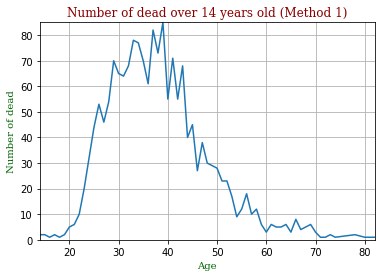

In [58]:
font_title = {'family': 'serif', 'color': 'darkred'}
font_label = {'family': 'serif', 'color': 'darkgreen'}
df_age_over14_number_dead.plot.line(x='age', y='number of dead')
plt.title('Number of dead over 14 years old (Method 1)', fontdict=font_title)
plt.xlabel('Age', fontdict=font_label)
plt.ylabel('Number of dead', fontdict=font_label)
plt.legend('', frameon=False)
plt.grid(True)
plt.axis([14, df_age_over14_number_dead['age'].max(), 0, df_age_over14_number_dead['number of dead'].max()])
plt.show()

#### Способ 2
Библиотека ***plotly***

In [59]:
px.line(df_age_over14_number_dead, x='age', y='number of dead', title='Number of dead over 14 years old (Method 2)').show()

### Задача 6
Построить круговую диаграмму, отражающую процентное соотношение умерших пациентов в возрасте до 30 лет, проведя распределение по регионам Австралии.

In [60]:
query = 'age <= 30 and status == "D"'
df_number_dead_before30 = df.query(query)['state'].value_counts().sort_index().to_frame(name='number of dead')
df_number_dead_before30.reset_index(inplace=True)
df_number_dead_before30 = df_number_dead_before30.rename(columns={'index': 'state'})
print('Ratio of deceased patients under 30 years of age:')
print(df_number_dead_before30.head(5))
values = df_number_dead_before30['number of dead']
sum_values = sum(values)
explode = [0.05] * values.count()
labels = df_number_dead_before30['state']
autopct = lambda pct: f'{round(pct, 1)}%\n{round(pct * sum_values / 100)} people'
wedgeprops = dict(width=0.8, edgecolor='w')

Ratio of deceased patients under 30 years of age:
   state  number of dead
0    NSW             269
1  Other              33
2    QLD              39
3    VIC              88


#### Способ 1
Метод ***plot.pie***

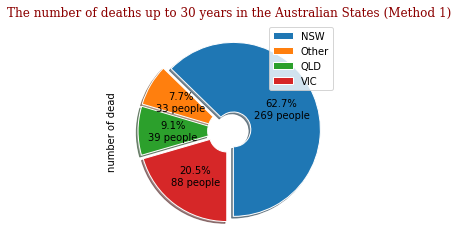

In [61]:
df_number_dead_before30.plot.pie(y='number of dead', explode=explode, shadow=True, autopct=autopct, startangle=-90, wedgeprops=wedgeprops, labeldistance=None)
title = 'The number of deaths up to 30 years in the Australian States (Method 1)'
font_title = {'family': 'serif', 'color': 'darkred'}
plt.title(title, fontdict=font_title)
plt.legend(labels)
plt.show()

#### Способ 2
Библиотека ***matplotlib***

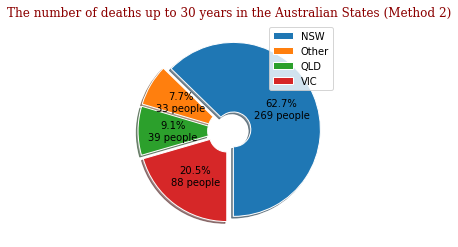

In [62]:
plt.pie(x=values, explode=explode, shadow=True, autopct=autopct, startangle=-90, wedgeprops=wedgeprops)
title = 'The number of deaths up to 30 years in the Australian States (Method 2)'
font_title = {'family': 'serif', 'color': 'darkred'}
plt.title(title, fontdict=font_title)
plt.legend(labels)
plt.show()

### Задача 7
Подсчитать средний возраст умерших в представленный в датасете период от СПИДа пациентов для каждого региона и для Австралии в целом.

Результат представить гистограммой с группировкой.

Average age of deaths in the States:
   state  median age
0    NSW   38.183692
1  Other   36.669014
2    QLD   37.945946
3    VIC   36.952113
4    all   37.793299


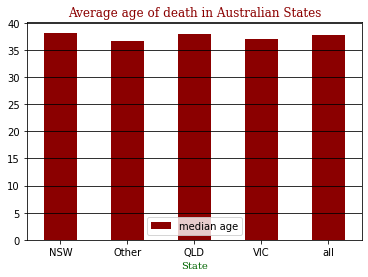

In [63]:
df_state_mean_age_dead = pd.DataFrame(columns=['state', 'median age'])
states = df['state'].drop_duplicates()
states.reset_index(inplace=True, drop=True)
for i in range(states.size):
	query = f'status == "D" and state == "{states[i]}"'
	df_state_mean_age_dead.loc[i] = [states[i], df.query(query)['age'].mean()]
df_state_mean_age_dead.loc[states.size] = ['all', df.query('status == "D"')['age'].mean()]
print('Average age of deaths in the States:')
print(df_state_mean_age_dead)
title = 'Average age of death in Australian States'
font_title = {'family': 'serif', 'color': 'darkred'}
font_label = {'family': 'serif', 'color': 'darkgreen'}
df_state_mean_age_dead.plot.bar(x='state', color='darkred', rot=0)
plt.title(title, fontdict=font_title)
plt.xlabel('State', fontdict=font_label)
plt.grid(axis='y', color='k')
plt.show()

### Задача 8
Определить возраст самого молодого и самого старого умерших пациентов в каждом регионе.

В каких регионах среди инфицированных было больше пожилых людей (от 55)?

В каких преобладает молодёжь (до 30)?

В каких больше всего людей среднего возраста (от 31 до 54)?

In [64]:
def func_age_statistic(df):
	df_dead = df.query('status == "D"')
	df_dead_ages = df_dead['age']
	min_age_dead = df_dead_ages.min()
	max_age_dead = df_dead_ages.max()
	print(f'The youngest deceased patient was {min_age_dead} years old')
	print(f'The oldest deceased patient was {max_age_dead} years old')
	number_young = df.query('age <= 30')['age'].size
	number_midlife = df.query('31 <= age <= 54')['age'].size
	number_old = df.query('age >= 55')['age'].size
	main_ages = []
	if number_young >= number_midlife and number_young >= number_old:
		main_ages.append('young')
	if number_midlife >= number_young and number_midlife >= number_old:
		main_ages.append('midlife')
	if number_old >= number_young and number_old >= number_midlife:
		main_ages.append('old')
	print(f'There are the most {str(main_ages)} patients here')

print('All States:')
func_age_statistic(df)
for state in states:
	print(f'State "{state}":')
	func_age_statistic(df.query(f'state == "{state}"'))

All States:
The youngest deceased patient was 0 years old
The oldest deceased patient was 82 years old
There are the most ['midlife'] patients here
State "NSW":
The youngest deceased patient was 3 years old
The oldest deceased patient was 82 years old
There are the most ['midlife'] patients here
State "Other":
The youngest deceased patient was 0 years old
The oldest deceased patient was 60 years old
There are the most ['midlife'] patients here
State "QLD":
The youngest deceased patient was 0 years old
The oldest deceased patient was 73 years old
There are the most ['midlife'] patients here
State "VIC":
The youngest deceased patient was 1 years old
The oldest deceased patient was 69 years old
There are the most ['midlife'] patients here


### Задача 9
Какими способами происходило заражение СПИДом по регионам?

Результат в виде количества случаев заражения визуализируйте гистограммой.

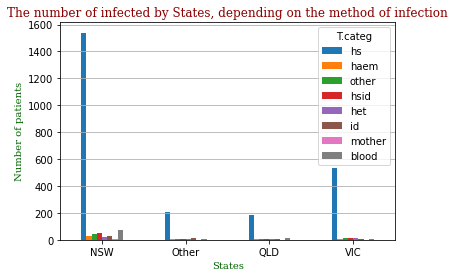

In [65]:
t_categories = df['T.categ'].drop_duplicates()
t_categories.reset_index(inplace=True, drop=True)
states_t_categories_frame = pd.DataFrame(columns=t_categories.values)
for state in states:
	data_state_frame = df.query(f'state == "{state}"')
	state_t_categories_sizes = []
	for t_categ in t_categories:
		state_t_categories_sizes.append(data_state_frame.loc[data_state_frame['T.categ'] == t_categ].shape[0])
	states_t_categories_frame.loc[state] = state_t_categories_sizes
states_t_categories_frame.plot.bar(rot=0)
title = 'The number of infected by States, depending on the method of infection'
plt.title(title, fontdict=font_title)
plt.xlabel('States', fontdict=font_label)
plt.ylabel('Number of patients', fontdict=font_label)
plt.grid(axis='y')
plt.legend(title='T.categ')
plt.show()

### Задача 10
В какой возрастной группе (до 30, от 31 до 54, от 55) процен выживших пациентов больше, чем умерших?

Если таких несколько, перечислите все.

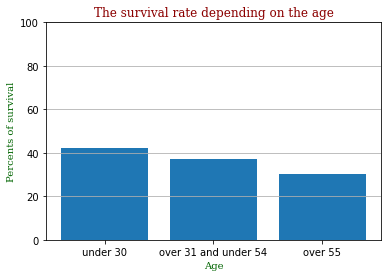

In [66]:
data_young_frame = df.query('age <= 30')
data_midlife_frame = df.query('31 <= age <= 54')
data_old_frame = df.query('55 <= age')
pct_alive_young = data_young_frame.query('status == "A"').shape[0] / data_young_frame.shape[0] * 100
pct_alive_midlife = data_midlife_frame.query('status == "A"').shape[0] / data_midlife_frame.shape[0] * 100
pct_alive_old = data_old_frame.query('status == "A"').shape[0] / data_old_frame.shape[0] * 100
title = 'The survival rate depending on the age'
plt.bar(['under 30', 'over 31 and under 54', 'over 55'], [pct_alive_young, pct_alive_midlife, pct_alive_old])
plt.title(title, fontdict=font_title)
plt.xlabel('Age', fontdict=font_label)
plt.ylabel('Percents of survival', fontdict=font_label)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

## Задание 2

![](https://storage.googleapis.com/kaggle-datasets-images/571/1094/c633ae058ddaa59f43649caac1748cf4/dataset-cover.png)

**Дано:**

Датасет *Anime Recommendations Database*, хранящий информацию о предпочтениях 73 516 пользователей на 12 294 аниме.

Датасет содержит 2 CSV файла:

Anime.csv, датафрейм которого содержит 12 294 строк и следующие столбцы:
- anime_id - уникальный идентификатор аниме
- name - название
- genre - список жанров
- type - тип, напр. TV, OVA, и.т.д. 
- episodes - количество серий
- rating - средний рейтинг (от 0 до 10)
- members - количество участников группы этого аниме

Rating.csv, датафрейм которого содержит 7 813 737 строк и следующие столбцы:
- user_id - случайный идентификатор пользователя
- anime_id - идентификатор оцениваемого аниме 
- rating - рейтинг (от 0 до 10)

Источник: https://www.kaggle.com/CooperUnion/anime-recommendations-database

Замечание*:

Средняя оценка аниме по датасету из файла Rating.csv не равна средней оценке по датасету из файла Anime.csv, откуда можно сделать вывод, что либо данная средняя оценка получена из другого источника, либо в датасете на основе Rating.csv дано неполное количество отзывов (оценок).

В задачах ниже значение средней оценки будет браться из датасета Anime.csv, если не оговарено явно обратное.

**Цель:**

Научиться работать с датасетами в *Python*.

### Задача 1
Прочитать данные из файлов Anime.csv, Rating.csv и загрузить их в датафреймы.

In [108]:
# Data:
# 2 Files with datasets in google.drive
filename_anime = 'drive/MyDrive/ITMO/data_analysis/python/Lab4/Anime.csv'
filename_rating = 'drive/MyDrive/ITMO/data_analysis/python/Lab4/Rating.csv'

# Decision:
# read data from files
df_anime = pd.read_csv(filename_anime).set_index('anime_id').sort_index()
df_rating = pd.read_csv(filename_rating)

# result of program:
print('Dataframe with animes:')
print(df_anime.head(5))
print()
print('Dataframe with ratings:')
print(df_rating.head(5))

Dataframe with animes:
                                     name  ... members
anime_id                                   ...        
1                            Cowboy Bebop  ...  486824
5         Cowboy Bebop: Tengoku no Tobira  ...  137636
6                                  Trigun  ...  283069
7                      Witch Hunter Robin  ...   64905
8                  Beet the Vandel Buster  ...    9848

[5 rows x 6 columns]

Dataframe with ratings:
   user_id  anime_id  rating
0        1        20      -1
1        1        24      -1
2        1        79      -1
3        1       226      -1
4        1       241      -1


In [109]:
## If you want to check statement (*) (Замечание) you can run the code below and change variables 'anime_id_begin' and 'anime_id_end'.
## The variables can be equal from 0 to 12 294 (number of rows in df_anime) but the distance can't be big, because the program isn't optimized.
# anime_id_begin = 0
# anime_id_end = 100
#for anime_id in df_anime.index[anime_id_begin:anime_id_end]:
#  if df_anime.loc[anime_id].at['rating'] == df_rating.query('anime_id == 1')['rating'].mean():
#    print(anime_id)

### Задача 2
Найти аниме, которое имеет максимальный средний рейтинг и количество оценок которого больше или равно 1000

In [110]:
df_anime_reverse_sort_ratings = df_anime.sort_values('rating', ascending=False)
for anime_id in df_anime_reverse_sort_ratings.index:
  number_ratings = df_rating.query(f'anime_id == {anime_id}').shape[0]
  if 1000 <= number_ratings:
    anime_name = df_anime.loc[anime_id].at['name']
    rating = df_anime.loc[anime_id].at['rating']
    print(f'Anime \'{anime_name}\' with anime_id \'{anime_id}\' has the maximum average rating \'{rating}\'')
    break

Anime 'Kimi no Na wa.' with anime_id '32281' has the maximum average rating '9.37'


### Задача 3
Сколько аниме с не менее чем 1000 отзывами (оценками) имеют средний рейтинг больше или равный 9?

In [111]:
number_anime_ratings_over1000 = 0
revers_sort_ratings = df_anime_reverse_sort_ratings['rating'].values
number_anime_rating_over9 = 0
for i in range(revers_sort_ratings.size):
  if revers_sort_ratings[i] < 9:
    number_anime_rating_over9 = i
    break
for anime_id in df_anime_reverse_sort_ratings.index[:number_anime_rating_over9]:
  if df_rating.query(f'anime_id == {anime_id}').shape[0] >= 1000:
    number_anime_ratings_over1000 += 1
print(f'{number_anime_ratings_over1000} animes has over 1000 ratings and average rating greater than 9.')

11 animes has over 1000 ratings and average rating greater than 9.


### Задача 4
Какое аниме имеет наибольшее количество отзывов (оценок)?

In [112]:
anime_ids = df_rating['anime_id'].values
max_anime_id = anime_ids.max()
array_anime_id_ratings = [0] * (max_anime_id + 1)
for anime_id in anime_ids:
  array_anime_id_ratings[anime_id] += 1
max_numbers_ratings = max(array_anime_id_ratings)
anime_ids_with_max_numbers_ratings = []
for anime_id in range(max_anime_id + 1):
  if array_anime_id_ratings[anime_id] == max_numbers_ratings:
    anime_ids_with_max_numbers_ratings.append(anime_id)
if len(anime_ids_with_max_numbers_ratings) == 1:
  anime_id = anime_ids_with_max_numbers_ratings[0]
  anime_name = df_anime.at[anime_id, 'name'] if anime_id in df_anime.index.values else '?'
  print(f'Anime \'{anime_name}\' with anime_id \'{anime_id}\' has the highest number of ratings equal to {max_numbers_ratings}')
else:
  print('Animes:')
  for anime_id in anime_ids_with_max_numbers_ratings:
    anime_name = df_anime.at[anime_id, 'name'] if anime_id in df_anime.index.values else '?'
    print(f'\'{anime_name}\' with anime_id \'{anime_id}\'')
  print(f'have the highest number of ratings equal to {max_numbers_ratings}')

Anime 'Death Note' with anime_id '1535' has the highest number of ratings equal to 39340


### Задача 5
Постройте график, который показывает разницу между средними оценками аниме датафреймов из файлов *Anime.csv* и *Rating.csv*.

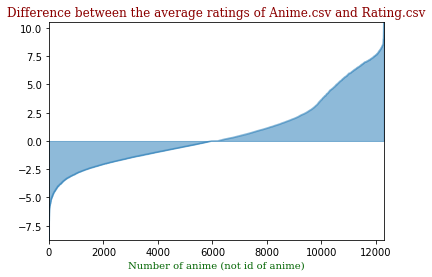

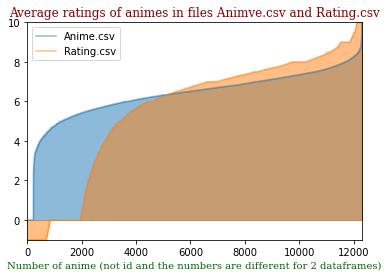

In [184]:
anime_ids = df_anime.index.values
anime_ids_df_rating = df_rating['anime_id'].drop_duplicates().values
anime_ids.sort()
anime_ids_df_rating.sort()
df_ratings = pd.DataFrame(index=anime_ids, columns=['df_anime', 'df_rating'])
array_pair_sum_ratings_number_ratings = [[0 for j in range(2)] for i in range(anime_ids.max() + 1)]
for i in df_rating.index.values:
  anime_id = df_rating.at[i, 'anime_id']
  rating = df_rating.at[i, 'rating']
  array_pair_sum_ratings_number_ratings[anime_id][0] += rating
  array_pair_sum_ratings_number_ratings[anime_id][1] += 1
for anime_id in anime_ids:
  rating_df_anime = df_anime.at[anime_id, 'rating']
  if math.isnan(rating_df_anime):
    rating_df_anime = 0
  rating_df_rating =  0
  if anime_id in anime_ids_df_rating:
    sum_ratings = array_pair_sum_ratings_number_ratings[anime_id][0]
    number_ratings = array_pair_sum_ratings_number_ratings[anime_id][1]
    if number_ratings != 0:
      rating_df_rating = sum_ratings / number_ratings
  df_ratings.loc[anime_id] = [rating_df_anime, rating_df_rating]
# print(df_ratings)
df_diffs_anime_rating_ratings = pd.DataFrame(index=anime_ids, columns=['diff_rating'])
df_ratings_copy = df_ratings
for anime_id in anime_ids:
  diff = df_ratings_copy.at[anime_id, 'df_anime'] - df_ratings_copy.at[anime_id, 'df_rating']
  df_diffs_anime_rating_ratings.loc[anime_id] = diff
df_diffs_anime_rating_ratings = df_diffs_anime_rating_ratings.sort_values('diff_rating')
df_diffs_anime_rating_ratings.reset_index(inplace=True, drop=True)
# print(df_diffs_anime_rating_ratings)
title = 'Difference between the average ratings of Anime.csv and Rating.csv'
min_diff = df_diffs_anime_rating_ratings['diff_rating'].min()
max_diff = df_diffs_anime_rating_ratings['diff_rating'].max()
df_diffs_anime_rating_ratings.plot.area(by='diff_rating', stacked=False)
plt.title(title, fontdict=font_title)
plt.xlabel('Number of anime (not id of anime)', fontdict=font_label)
plt.legend('', frameon=False)
plt.axis([0, df_diffs_anime_rating_ratings.shape[0], min_diff, max_diff])
plt.show()
df_ratings_copy = df_ratings_copy.sort_values('df_anime')
df_ratings_copy.reset_index(inplace=True, drop=True)
df_rating_sort_column = df_ratings_copy['df_rating']
df_rating_sort_column = df_rating_sort_column.sort_values()
df_rating_sort_column.reset_index(inplace=True, drop=True)
df_ratings_copy['df_rating'] = df_rating_sort_column
title = 'Average ratings of animes in files Animve.csv and Rating.csv'
df_ratings_copy.plot.area(stacked=False)
plt.title(title, fontdict=font_title)
plt.xlabel('Number of anime (not id and the numbers are different for 2 dataframes)', font_label)
plt.legend(labels=['Anime.csv', 'Rating.csv'])
plt.axis([0, df_ratings_copy.shape[0], -1, 10])
plt.show()

# Вывод
В ходе работы я научился работать с датасетами в *Python*, а именно:
- создавать датафреймы на основе CSV файлов
- обрабатывать датафреймы с помощью методов объектов *pandas.DataFrame*
- визуализировать датафреймы с помощью библиотек *mathplotlib.plotly*, *plotly.express* и методов *pandas.DataFrame.plot.**